In [52]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [53]:
url = r'D:\Summer Training TISL ML\Project\Placement_Data_Full_Class.csv'  #reading the data from the csv file
plc = pd.read_csv(url)
plc.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [54]:
plc.shape

(215, 15)

In [55]:
plc.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [56]:
plc.drop(['sl_no','ssc_b','specialisation','mba_p','salary'],axis=1,inplace=True)   #removing the unnecessary columns/features 

In [57]:
plc.head()

,gender,ssc_p,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,status
0,M,67.00,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Placed
1,M,79.33,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Placed
2,M,65.00,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Placed
3,M,56.00,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Not Placed
4,M,85.80,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Placed


In [58]:
plc['gender'] = plc['gender'].map({'M':0,'F':1})    #assigning numerical values
plc['hsc_b'] = plc['hsc_b'].map({'Others':0,'Central':1})
plc['hsc_s'] = plc['hsc_s'].map({'Arts':0,'Commerce':1,'Science':2})
plc.head()

,gender,ssc_p,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,status
0,0,67.00,91.00,0,1,58.00,Sci&Tech,No,55.0,Placed
1,0,79.33,78.33,0,2,77.48,Sci&Tech,Yes,86.5,Placed
2,0,65.00,68.00,1,0,64.00,Comm&Mgmt,No,75.0,Placed
3,0,56.00,52.00,1,2,52.00,Sci&Tech,No,66.0,Not Placed
4,0,85.80,73.60,1,1,73.30,Comm&Mgmt,No,96.8,Placed


In [59]:
print(plc['degree_t'].unique())  #printing the unique values

['Sci&Tech' 'Comm&Mgmt' 'Others']


In [60]:
plc['degree_t'] = plc['degree_t'].map({'Comm&Mgmt':0,'Sci&Tech':1,'Others':2})
plc.head()

,gender,ssc_p,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,status
0,0,67.00,91.00,0,1,58.00,1,No,55.0,Placed
1,0,79.33,78.33,0,2,77.48,1,Yes,86.5,Placed
2,0,65.00,68.00,1,0,64.00,0,No,75.0,Placed
3,0,56.00,52.00,1,2,52.00,1,No,66.0,Not Placed
4,0,85.80,73.60,1,1,73.30,0,No,96.8,Placed


In [61]:
plc['workex'] = plc['workex'].map({'No':0,'Yes':1})
plc.head()

,gender,ssc_p,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,status
0,0,67.00,91.00,0,1,58.00,1,0,55.0,Placed
1,0,79.33,78.33,0,2,77.48,1,1,86.5,Placed
2,0,65.00,68.00,1,0,64.00,0,0,75.0,Placed
3,0,56.00,52.00,1,2,52.00,1,0,66.0,Not Placed
4,0,85.80,73.60,1,1,73.30,0,0,96.8,Placed


In [62]:
plc['status'] = plc['status'].map({'Not Placed':0,'Placed':1})
plc.head()

,gender,ssc_p,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,status
0,0,67.00,91.00,0,1,58.00,1,0,55.0,1
1,0,79.33,78.33,0,2,77.48,1,1,86.5,1
2,0,65.00,68.00,1,0,64.00,0,0,75.0,1
3,0,56.00,52.00,1,2,52.00,1,0,66.0,0
4,0,85.80,73.60,1,1,73.30,0,0,96.8,1


In [63]:
plc['status'].value_counts()  #counting the values

1    148
0     67
Name: status, dtype: int64

In [64]:
plc.describe()

,gender,ssc_p,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,status
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.353488,67.303395,66.333163,0.390698,1.372093,66.370186,0.376744,0.344186,72.100558,0.688372
std,0.479168,10.827205,10.897509,0.489045,0.580978,7.358743,0.581987,0.476211,13.275956,0.464240
min,0.000000,40.890000,37.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000
25%,0.000000,60.600000,60.900000,0.000000,1.000000,61.000000,0.000000,0.000000,60.000000,0.000000
50%,0.000000,67.000000,65.000000,0.000000,1.000000,66.000000,0.000000,0.000000,71.000000,1.000000
75%,1.000000,75.700000,73.000000,1.000000,2.000000,72.000000,1.000000,1.000000,83.500000,1.000000
max,1.000000,89.400000,97.700000,1.000000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000


In [65]:
plc[['gender','status']].groupby(['gender'],as_index=False).mean()    #checking the dependency of gender on the placement status

,gender,status
0,0,0.719424
1,1,0.631579


In [66]:
plc['hsc_pBand'] = pd.cut(plc['hsc_p'],5)   #generating the range of values using the "cut" function

In [67]:
plc.head()

,gender,ssc_p,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,status,hsc_pBand
0,0,67.00,91.00,0,1,58.00,1,0,55.0,1,"(85.56, 97.7]"
1,0,79.33,78.33,0,2,77.48,1,1,86.5,1,"(73.42, 85.56]"
2,0,65.00,68.00,1,0,64.00,0,0,75.0,1,"(61.28, 73.42]"
3,0,56.00,52.00,1,2,52.00,1,0,66.0,0,"(49.14, 61.28]"
4,0,85.80,73.60,1,1,73.30,0,0,96.8,1,"(73.42, 85.56]"


In [68]:
plc[['hsc_pBand','status']].groupby(['hsc_pBand'],as_index=False).mean()

,hsc_pBand,status
0,"(36.939, 49.14]",0.000000
1,"(49.14, 61.28]",0.530612
2,"(61.28, 73.42]",0.733333
3,"(73.42, 85.56]",0.888889
4,"(85.56, 97.7]",1.000000


In [69]:
plc.loc[ plc['hsc_p'] <= 40, 'hsc_p'] = 0      #diving into various ranges and assigning numerical values accordingly
plc.loc[(plc['hsc_p'] > 40) & (plc['hsc_p'] <= 65), 'hsc_p'] = 1
plc.loc[(plc['hsc_p'] > 65) & (plc['hsc_p'] <= 80), 'hsc_p'] = 2
plc.loc[(plc['hsc_p'] > 80) & (plc['hsc_p'] <= 90), 'hsc_p'] = 3
plc.loc[ plc['hsc_p'] > 90, 'hsc_p'] = 4

In [70]:
plc.head()

,gender,ssc_p,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,status,hsc_pBand
0,0,67.00,4.0,0,1,58.00,1,0,55.0,1,"(85.56, 97.7]"
1,0,79.33,2.0,0,2,77.48,1,1,86.5,1,"(73.42, 85.56]"
2,0,65.00,2.0,1,0,64.00,0,0,75.0,1,"(61.28, 73.42]"
3,0,56.00,1.0,1,2,52.00,1,0,66.0,0,"(49.14, 61.28]"
4,0,85.80,2.0,1,1,73.30,0,0,96.8,1,"(73.42, 85.56]"


In [71]:
plc['hsc_p'].value_counts()

1.0    108
2.0     86
3.0     13
4.0      5
0.0      3
Name: hsc_p, dtype: int64

In [72]:
plc.loc[ plc['ssc_p'] <= 45, 'ssc_p'] = 0
plc.loc[(plc['ssc_p'] > 45) & (plc['ssc_p'] <= 60), 'ssc_p'] = 1
plc.loc[(plc['ssc_p'] > 60) & (plc['ssc_p'] <= 70), 'ssc_p'] = 2
plc.loc[(plc['ssc_p'] > 70) & (plc['ssc_p'] <= 80), 'ssc_p'] = 3
plc.loc[ plc['ssc_p'] > 80, 'ssc_p'] = 4

In [73]:
plc.head()

,gender,ssc_p,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,status,hsc_pBand
0,0,2.0,4.0,0,1,58.00,1,0,55.0,1,"(85.56, 97.7]"
1,0,3.0,2.0,0,2,77.48,1,1,86.5,1,"(73.42, 85.56]"
2,0,2.0,2.0,1,0,64.00,0,0,75.0,1,"(61.28, 73.42]"
3,0,1.0,1.0,1,2,52.00,1,0,66.0,0,"(49.14, 61.28]"
4,0,4.0,2.0,1,1,73.30,0,0,96.8,1,"(73.42, 85.56]"


In [74]:
plc['ssc_p'].value_counts()

2.0    79
3.0    55
1.0    47
4.0    29
0.0     5
Name: ssc_p, dtype: int64

In [75]:
plc.drop(['hsc_pBand'],axis=1,inplace=True)

In [76]:
plc.head()

,gender,ssc_p,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,status
0,0,2.0,4.0,0,1,58.00,1,0,55.0,1
1,0,3.0,2.0,0,2,77.48,1,1,86.5,1
2,0,2.0,2.0,1,0,64.00,0,0,75.0,1
3,0,1.0,1.0,1,2,52.00,1,0,66.0,0
4,0,4.0,2.0,1,1,73.30,0,0,96.8,1


In [77]:
plc.loc[ plc['degree_p'] <= 55, 'degree_p'] = 0
plc.loc[(plc['degree_p'] > 55) & (plc['degree_p'] <= 65), 'degree_p'] = 1
plc.loc[(plc['degree_p'] > 65) & (plc['degree_p'] <= 75), 'degree_p'] = 2
plc.loc[(plc['degree_p'] > 75) & (plc['degree_p'] <= 85), 'degree_p'] = 3
plc.loc[ plc['degree_p'] > 85, 'degree_p'] = 4

In [78]:
plc.head()

,gender,ssc_p,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,status
0,0,2.0,4.0,0,1,1.0,1,0,55.0,1
1,0,3.0,2.0,0,2,3.0,1,1,86.5,1
2,0,2.0,2.0,1,0,1.0,0,0,75.0,1
3,0,1.0,1.0,1,2,0.0,1,0,66.0,0
4,0,4.0,2.0,1,1,2.0,0,0,96.8,1


In [79]:
plc.loc[ plc['etest_p'] <= 55, 'etest_p'] = 0
plc.loc[(plc['etest_p'] > 55) & (plc['etest_p'] <= 65), 'etest_p'] = 1
plc.loc[(plc['etest_p'] > 65) & (plc['etest_p'] <= 75), 'etest_p'] = 2
plc.loc[(plc['etest_p'] > 75) & (plc['etest_p'] <= 85), 'etest_p'] = 3
plc.loc[ plc['etest_p'] > 85, 'etest_p'] = 4

In [80]:
plc.head()

,gender,ssc_p,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,status
0,0,2.0,4.0,0,1,1.0,1,0,0.0,1
1,0,3.0,2.0,0,2,3.0,1,1,4.0,1
2,0,2.0,2.0,1,0,1.0,0,0,2.0,1
3,0,1.0,1.0,1,2,0.0,1,0,2.0,0
4,0,4.0,2.0,1,1,2.0,0,0,4.0,1


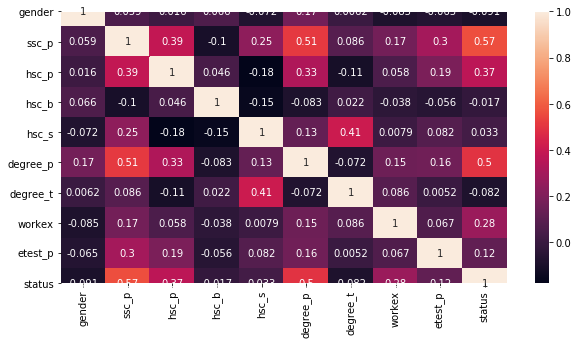

In [81]:
#generating the heatmap
fig, corr = plt.subplots(figsize=(10,5))
sb.heatmap(plc.corr(), annot=True)
plt.show()

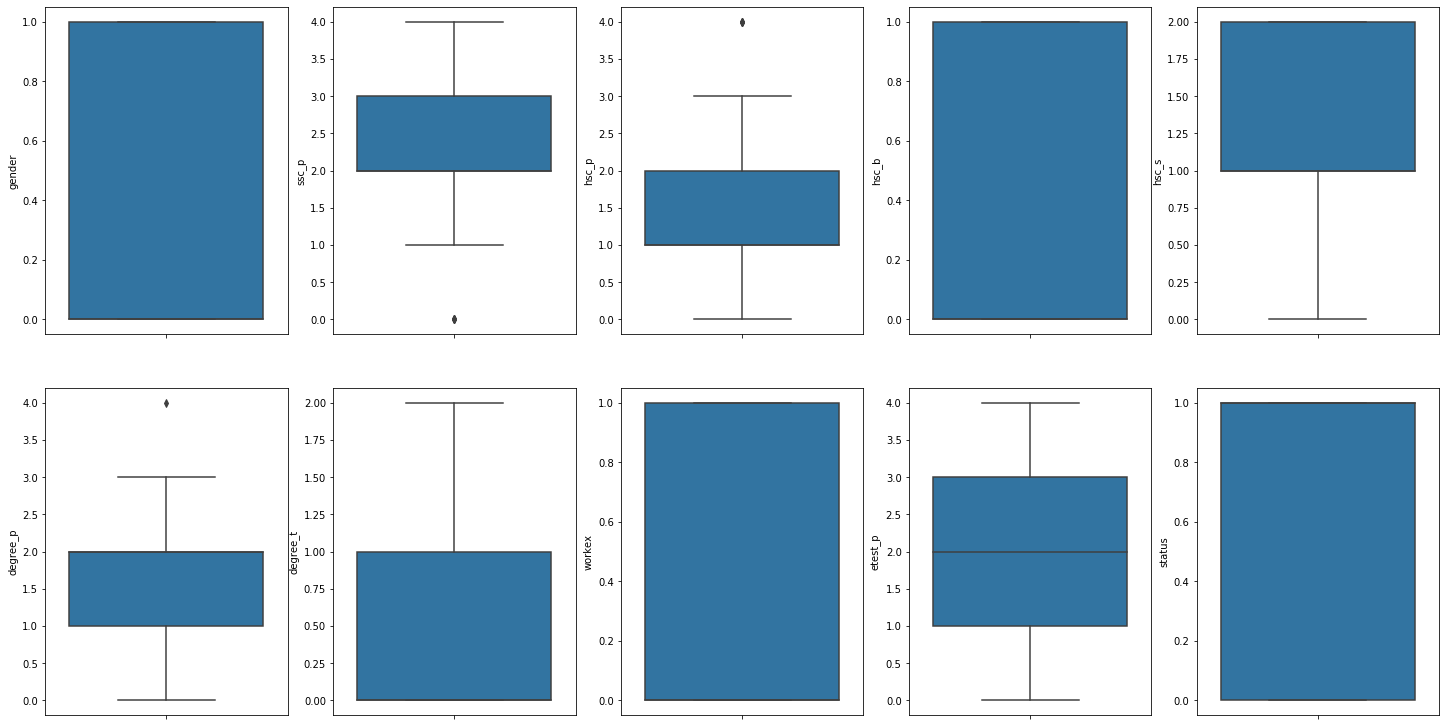

In [82]:
fig1, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in plc.items():
    sb.boxplot(y=v, data=plc, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.1, h_pad=5.0)
plt.show()

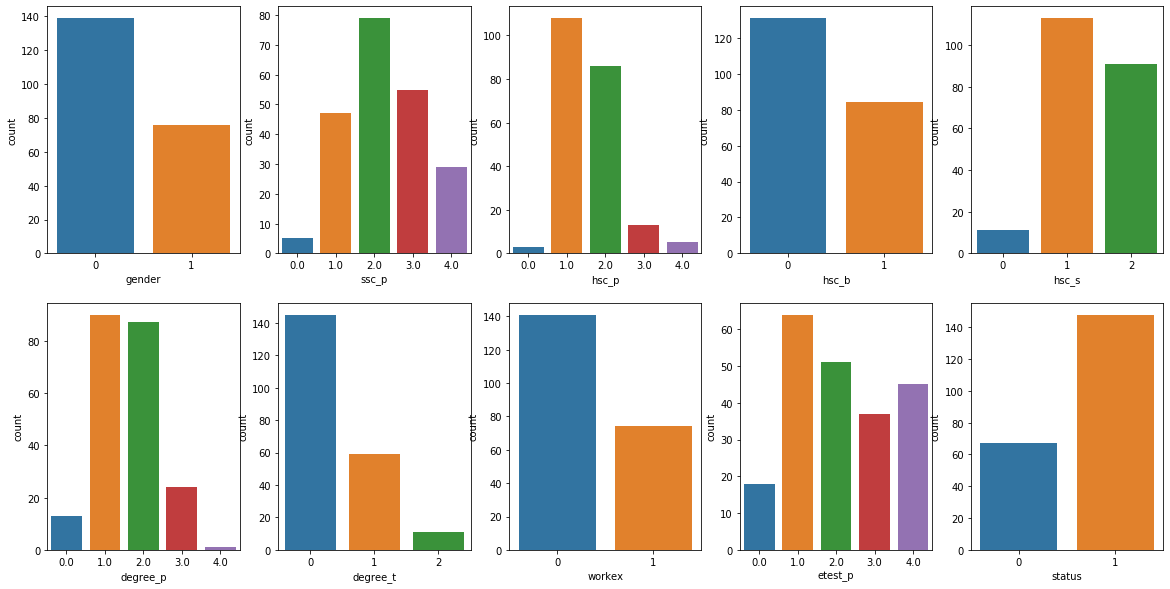

In [83]:
fig2, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in plc.items():
    sb.countplot(x=v, data=plc, ax=axs[index])
    index += 1

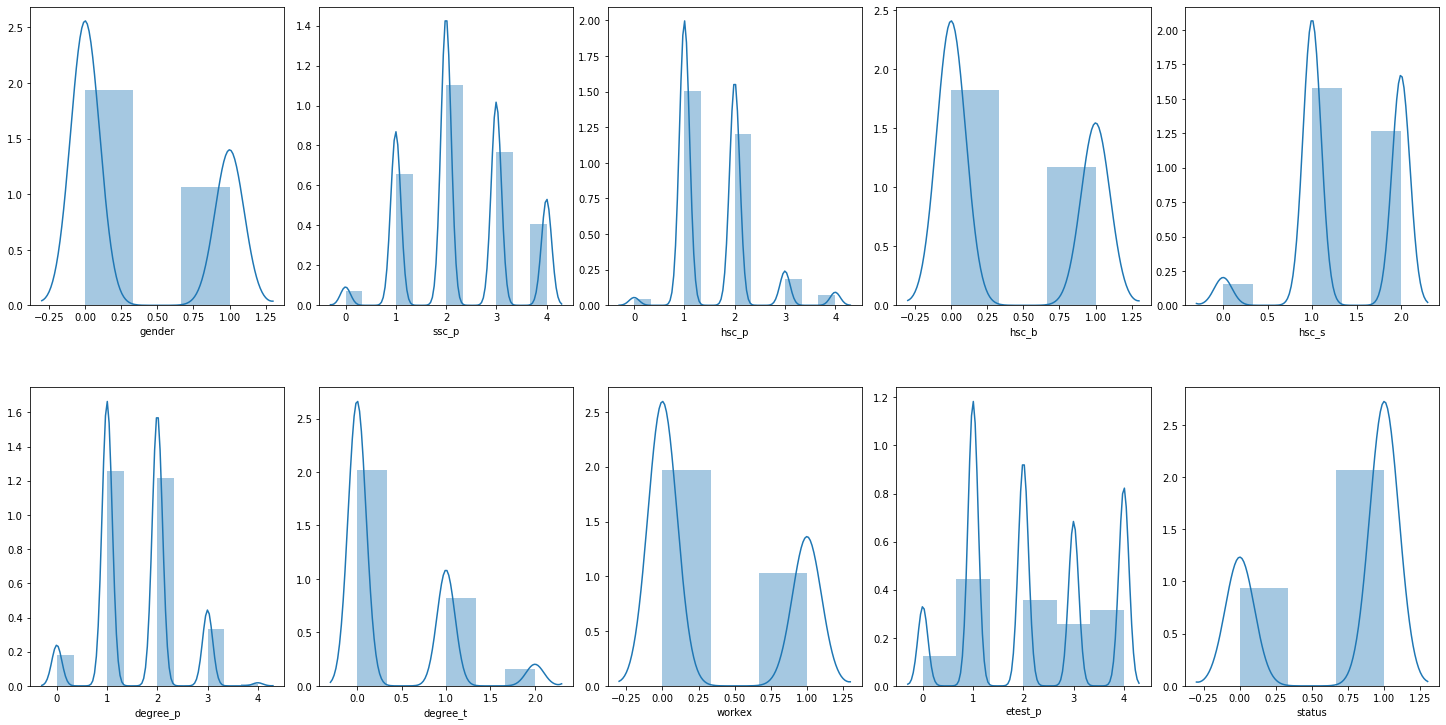

In [84]:
fig3, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in plc.items():
    sb.distplot(v, ax=axs[index],kde_kws={'bw': 0.1}) # for some prob write kde
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [85]:
X=plc.iloc[:,:9]      #extracting values from the original table into X

In [86]:
Y=plc.iloc[:,9]       #extracting values from the original table into Y

In [87]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.1,random_state=1)   #randomly splitting the value

<h2><b>Using Logistic Regression</b></h2>

In [88]:
log=LogisticRegression()   #the logistic regression function

In [89]:
log.fit(x_train,y_train)    #the fit function is used to train our model

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
y_pred=log.predict(x_test)

In [91]:
y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1],
      dtype=int64)

In [92]:
accuracy_score(y_pred,y_test)

0.8181818181818182

In [93]:
log.score(x_train,y_train)

0.8549222797927462

In [94]:
len(y_test)

22

In [95]:
confusion_matrix(y_pred,y_test)

array([[ 5,  3],
       [ 1, 13]], dtype=int64)

In [96]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.81      0.93      0.87        14

    accuracy                           0.82        22
   macro avg       0.82      0.78      0.79        22
weighted avg       0.82      0.82      0.81        22



<h2><b>Using Naive Bayes Classification</b></h2>

In [97]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [98]:
y_prednb = nvclassifier.predict(x_test)
print(y_prednb)

[1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0]


In [99]:
accuracy_score(y_prednb,y_test)

0.7727272727272727

In [100]:
nvclassifier.score(x_train,y_train)

0.8393782383419689

In [101]:
confusion_matrix(y_prednb,y_test)

array([[ 5,  4],
       [ 1, 12]], dtype=int64)

In [102]:
print(classification_report(y_prednb,y_test))

              precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.75      0.92      0.83        13

    accuracy                           0.77        22
   macro avg       0.79      0.74      0.75        22
weighted avg       0.78      0.77      0.76        22



<h2><b>Conclusion</b></h2>
<ol>
    <li>Using Logistic regression --> 82% accuracy</li>
    <li>Using Naive Bayes Classifier --> 77% accuracy</li>
<ol>